In [ ]:
!pip install kaggle --quiet

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# !kaggle datasets download -d sobhanmoosavi/us-accidents
# !unzip us-accidents.zip
import kagglehub
path = kagglehub.dataset_download("sobhanmoosavi/us-accidents")


100%|██████████| 653M/653M [00:09<00:00, 72.7MB/s]

Extracting files...


In [3]:
print(path)

/root/.cache/kagglehub/datasets/sobhanmoosavi/us-accidents/versions/13


In [4]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 587, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (71/71), done.
Receiving objects: 100% (587/587), 192.90 KiB | 1007.00 KiB/s, done.
remote: Total 587 (delta 122), reused 82 (delta 82), pack-reused 434 (from 3)
Resolving deltas: 100% (296/296), done.
Installing RAPIDS remaining 25.02 libraries
Using Python 3.11.11 environment at: /usr
Resolved 172 packages in 1.22s
 Downloaded cuproj-cu12
 Downloaded cuspatial-cu12
 Downloaded libcuspatial-cu12
 Downloaded datashader
 Downloaded cugraph-cu12
 Downloaded cucim-cu12
Prepared 23 packages in 824ms
Uninstalled 2 packages in 24ms
Installed 23 packages in 41ms
 + arrow==1.3.0
 + cucim-cu12==25.2.0
 + cugraph-cu12==25.2.0
 + cuproj-cu12==25.2.0
 + cuspatial-cu12==25.2.0
 + cuxfilter-cu12==25.2.0
 + datashader==0.17.0
 + fqdn==1.5.1
 + isoduration==20.11.0
 - jupyter-client==6.1.12
 + jupyter-client==8.6.3
 + jupyter-events==0.12.0
 - j

In [5]:
import cudf
cudf.__version__

'25.02.01'

In [6]:
# import pandas as pd
import cudf as pd

df_total= pd.read_csv("/root/.cache/kagglehub/datasets/sobhanmoosavi/us-accidents/versions/13/US_Accidents_March23.csv")

In [7]:
df_total.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618420e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407000e-03
std,4.875310e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102250e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618350e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [8]:
df_total.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,<NA>,<NA>,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,<NA>,<NA>,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,<NA>,<NA>,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,<NA>,<NA>,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,<NA>,<NA>,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,<NA>,<NA>,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,<NA>,<NA>,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,<NA>,<NA>,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,<NA>,<NA>,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,<NA>,<NA>,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
df = df_total[["Severity" , "Weather_Timestamp", "Temperature(F)" , "Wind_Chill(F)" , "Humidity(%)" , "Pressure(in)" , "Visibility(mi)" , "Wind_Direction" , "Wind_Speed(mph)" ,"Precipitation(in)", "Weather_Condition"]]

In [10]:
df.head(10)

,Severity,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
0,3,2016-02-08 05:58:00,36.9,<NA>,91.0,29.68,10.0,Calm,<NA>,0.02,Light Rain
1,2,2016-02-08 05:51:00,37.9,<NA>,100.0,29.65,10.0,Calm,<NA>,0.0,Light Rain
2,2,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,<NA>,Overcast
3,3,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,<NA>,Mostly Cloudy
4,2,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,<NA>,Mostly Cloudy
5,3,2016-02-08 07:51:00,37.9,35.5,97.0,29.63,7.0,SSW,3.5,0.03,Light Rain
6,2,2016-02-08 07:56:00,34.0,31.0,100.0,29.66,7.0,WSW,3.5,<NA>,Overcast
7,3,2016-02-08 07:56:00,34.0,31.0,100.0,29.66,7.0,WSW,3.5,<NA>,Overcast
8,2,2016-02-08 07:58:00,33.3,<NA>,99.0,29.67,5.0,SW,1.2,<NA>,Mostly Cloudy
9,3,2016-02-08 08:28:00,37.4,33.8,100.0,29.62,3.0,SSW,4.6,0.02,Light Rain


In [11]:
df.describe()

,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407000e-03
std,4.875310e-01,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102250e-01
min,1.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


# پیدا کردن تعدار خالی ها هر ستون

In [12]:
print(df.isna().sum())


Severity                   0
Weather_Timestamp     120228
Temperature(F)        163853
Wind_Chill(F)        1999019
Humidity(%)           174144
Pressure(in)          140679
Visibility(mi)        177098
Wind_Direction        175206
Wind_Speed(mph)       571233
Precipitation(in)    2203586
Weather_Condition     173459
dtype: int64


ستون Precipitation

ستون wind chill

به دلیل تعداد خالی های خیلی زیاد بهتر است حذف شوند به نام جدید ذخیره میشود

In [13]:
df1 = df.drop(columns=["Precipitation(in)", "Wind_Chill(F)"])
df1.head()
df1.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 9 columns):
 #   Column             Dtype
---  ------             -----
 0   Severity           int64
 1   Weather_Timestamp  object
 2   Temperature(F)     float64
 3   Humidity(%)        float64
 4   Pressure(in)       float64
 5   Visibility(mi)     float64
 6   Wind_Direction     object
 7   Wind_Speed(mph)    float64
 8   Weather_Condition  object
dtypes: float64(5), int64(1), object(3)
memory usage: 663.2+ MB


In [14]:
print(df1.isna().sum())


Severity                  0
Weather_Timestamp    120228
Temperature(F)       163853
Humidity(%)          174144
Pressure(in)         140679
Visibility(mi)       177098
Wind_Direction       175206
Wind_Speed(mph)      571233
Weather_Condition    173459
dtype: int64


In [15]:
df1["Weather_Condition"].fillna("Unknown", inplace=True)
df1["Wind_Direction"].fillna("Unknown", inplace=True)
df1["Temperature(F)"] = df1["Temperature(F)"].interpolate(method="linear")
df1["Humidity(%)"] = df1["Humidity(%)"].interpolate(method="linear")
df1["Pressure(in)"] = df1["Pressure(in)"].interpolate(method="linear")
df1["Visibility(mi)"] = df1["Visibility(mi)"].interpolate(method="linear")
df1["Wind_Speed(mph)"] = df1["Wind_Speed(mph)"].interpolate(method="linear")




In [16]:
print(df1.isna().sum())


Severity                  0
Weather_Timestamp    120228
Temperature(F)            0
Humidity(%)               0
Pressure(in)              0
Visibility(mi)            0
Wind_Direction            0
Wind_Speed(mph)           2
Weather_Condition         0
dtype: int64


In [17]:
df1["Wind_Speed(mph)"] = df1["Wind_Speed(mph)"].bfill()
df1["Weather_Timestamp"] = df1["Weather_Timestamp"].ffill()


In [18]:
print(df1.isna().sum())


Severity             0
Weather_Timestamp    0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Weather_Condition    0
dtype: int64


**انکود کردن لیبل دار ها**

In [19]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

conditions1 = df["Wind_Direction"].unique()
conditions2 = df["Weather_Condition"].unique()

print(len(conditions1))
print("######################")
print(len(conditions2))



25
######################
145


In [20]:
import numpy as np
df1["weather_condition_Label"] = encoder.fit_transform(df1['Weather_Condition'].to_numpy()).astype(np.uint8)

In [21]:
df1["Wind_Direction_label"] = encoder.fit_transform(df1['Wind_Direction'].to_numpy()).astype(np.uint8)

In [22]:
df1.head(10)

,Severity,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,weather_condition_Label,Wind_Direction_label
0,3,2016-02-08 05:58:00,36.9,91.0,29.68,10.0,Calm,3.5,Light Rain,62,1
1,2,2016-02-08 05:51:00,37.9,100.0,29.65,10.0,Calm,3.5,Light Rain,62,1
2,2,2016-02-08 06:56:00,36.0,100.0,29.67,10.0,SW,3.5,Overcast,88,16
3,3,2016-02-08 07:38:00,35.1,96.0,29.64,9.0,SW,4.6,Mostly Cloudy,85,16
4,2,2016-02-08 07:53:00,36.0,89.0,29.65,6.0,SW,3.5,Mostly Cloudy,85,16
5,3,2016-02-08 07:51:00,37.9,97.0,29.63,7.0,SSW,3.5,Light Rain,62,15
6,2,2016-02-08 07:56:00,34.0,100.0,29.66,7.0,WSW,3.5,Overcast,88,23
7,3,2016-02-08 07:56:00,34.0,100.0,29.66,7.0,WSW,3.5,Overcast,88,23
8,2,2016-02-08 07:58:00,33.3,99.0,29.67,5.0,SW,1.2,Mostly Cloudy,85,16
9,3,2016-02-08 08:28:00,37.4,100.0,29.62,3.0,SSW,4.6,Light Rain,62,15


In [23]:
df1.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 11 columns):
 #   Column                   Dtype
---  ------                   -----
 0   Severity                 int64
 1   Weather_Timestamp        object
 2   Temperature(F)           float64
 3   Humidity(%)              float64
 4   Pressure(in)             float64
 5   Visibility(mi)           float64
 6   Wind_Direction           object
 7   Wind_Speed(mph)          float64
 8   Weather_Condition        object
 9   weather_condition_Label  uint8
 10  Wind_Direction_label     uint8
dtypes: float64(5), int64(1), object(3), uint8(2)
memory usage: 675.0+ MB


# فهمیدن بازه اعدادی هر ستون و تصمیم گیری برای تغییر تایپ آن ها

In [24]:


# استخراج و خلاصه‌سازی ستون‌های موردنظر
df_selected = df[["Severity", "Temperature(F)", "Wind_Chill(F)", "Humidity(%)",
                  "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)",
                  "Precipitation(in)"]]

print(df_selected.describe())


           Severity  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  7.728394e+06    7.564541e+06   5.729375e+06  7.554250e+06   
mean   2.212384e+00    6.166329e+01   5.825105e+01  6.483104e+01   
std    4.875310e-01    1.901365e+01   2.238983e+01  2.282097e+01   
min    1.000000e+00   -8.900000e+01  -8.900000e+01  1.000000e+00   
25%    2.000000e+00    4.900000e+01   4.300000e+01  4.800000e+01   
50%    2.000000e+00    6.400000e+01   6.200000e+01  6.700000e+01   
75%    2.000000e+00    7.600000e+01   7.500000e+01  8.400000e+01   
max    4.000000e+00    2.070000e+02   2.070000e+02  1.000000e+02   

       Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
count  7.587715e+06    7.551296e+06     7.157161e+06       5.524808e+06  
mean   2.953899e+01    9.090376e+00     7.685490e+00       8.407000e-03  
std    1.006190e+00    2.688316e+00     5.424983e+00       1.102250e-01  
min    0.000000e+00    0.000000e+00     0.000000e+00       0.000000e+00  
25%    2.937000e+

In [25]:
df1=df1.astype({
    "Severity": np.uint8,
    "Temperature(F)": np.int16,
    "Humidity(%)": np.uint8,
    "Pressure(in)": np.float32,
    "Visibility(mi)": np.uint8,
    "Wind_Speed(mph)": np.uint16,
})

# saving df as df1 with reducing size and changing its types

In [27]:
df1.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 11 columns):
 #   Column                   Dtype
---  ------                   -----
 0   Severity                 uint8
 1   Weather_Timestamp        object
 2   Temperature(F)           int16
 3   Humidity(%)              uint8
 4   Pressure(in)             float32
 5   Visibility(mi)           uint8
 6   Wind_Direction           object
 7   Wind_Speed(mph)          uint16
 8   Weather_Condition        object
 9   weather_condition_Label  uint8
 10  Wind_Direction_label     uint8
dtypes: float32(1), int16(1), object(3), uint16(1), uint8(5)
memory usage: 402.3+ MB


In [28]:
df1.head(20)

,Severity,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,weather_condition_Label,Wind_Direction_label
0,3,2016-02-08 05:58:00,36,91,29.680000,10,Calm,3,Light Rain,62,1
1,2,2016-02-08 05:51:00,37,100,29.650000,10,Calm,3,Light Rain,62,1
2,2,2016-02-08 06:56:00,36,100,29.670000,10,SW,3,Overcast,88,16
3,3,2016-02-08 07:38:00,35,96,29.639999,9,SW,4,Mostly Cloudy,85,16
4,2,2016-02-08 07:53:00,36,89,29.650000,6,SW,3,Mostly Cloudy,85,16
5,3,2016-02-08 07:51:00,37,97,29.629999,7,SSW,3,Light Rain,62,15
6,2,2016-02-08 07:56:00,34,100,29.660000,7,WSW,3,Overcast,88,23
7,3,2016-02-08 07:56:00,34,100,29.660000,7,WSW,3,Overcast,88,23
8,2,2016-02-08 07:58:00,33,99,29.670000,5,SW,1,Mostly Cloudy,85,16
9,3,2016-02-08 08:28:00,37,100,29.620001,3,SSW,4,Light Rain,62,15


In [29]:
df1.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 11 columns):
 #   Column                   Dtype
---  ------                   -----
 0   Severity                 uint8
 1   Weather_Timestamp        object
 2   Temperature(F)           int16
 3   Humidity(%)              uint8
 4   Pressure(in)             float32
 5   Visibility(mi)           uint8
 6   Wind_Direction           object
 7   Wind_Speed(mph)          uint16
 8   Weather_Condition        object
 9   weather_condition_Label  uint8
 10  Wind_Direction_label     uint8
dtypes: float32(1), int16(1), object(3), uint16(1), uint8(5)
memory usage: 402.3+ MB


In [30]:
df2 = df1.drop(columns=["Weather_Condition", "Wind_Direction"])


In [31]:
df2.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 9 columns):
 #   Column                   Dtype
---  ------                   -----
 0   Severity                 uint8
 1   Weather_Timestamp        object
 2   Temperature(F)           int16
 3   Humidity(%)              uint8
 4   Pressure(in)             float32
 5   Visibility(mi)           uint8
 6   Wind_Speed(mph)          uint16
 7   weather_condition_Label  uint8
 8   Wind_Direction_label     uint8
dtypes: float32(1), int16(1), object(1), uint16(1), uint8(5)
memory usage: 265.3+ MB


In [32]:
print(df2.isna().sum())
df2["Weather_Timestamp"] = pd.to_datetime(df2["Weather_Timestamp"])

Severity                   0
Weather_Timestamp          0
Temperature(F)             0
Humidity(%)                0
Pressure(in)               0
Visibility(mi)             0
Wind_Speed(mph)            0
weather_condition_Label    0
Wind_Direction_label       0
dtype: int64


In [33]:
df2.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 9 columns):
 #   Column                   Dtype
---  ------                   -----
 0   Severity                 uint8
 1   Weather_Timestamp        datetime64[ns]
 2   Temperature(F)           int16
 3   Humidity(%)              uint8
 4   Pressure(in)             float32
 5   Visibility(mi)           uint8
 6   Wind_Speed(mph)          uint16
 7   weather_condition_Label  uint8
 8   Wind_Direction_label     uint8
dtypes: datetime64[ns](1), float32(1), int16(1), uint16(1), uint8(5)
memory usage: 154.8 MB


In [34]:
df2.head(10)

,Severity,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),weather_condition_Label,Wind_Direction_label
0,3,2016-02-08 05:58:00,36,91,29.680000,10,3,62,1
1,2,2016-02-08 05:51:00,37,100,29.650000,10,3,62,1
2,2,2016-02-08 06:56:00,36,100,29.670000,10,3,88,16
3,3,2016-02-08 07:38:00,35,96,29.639999,9,4,85,16
4,2,2016-02-08 07:53:00,36,89,29.650000,6,3,85,16
5,3,2016-02-08 07:51:00,37,97,29.629999,7,3,62,15
6,2,2016-02-08 07:56:00,34,100,29.660000,7,3,88,23
7,3,2016-02-08 07:56:00,34,100,29.660000,7,3,88,23
8,2,2016-02-08 07:58:00,33,99,29.670000,5,1,85,16
9,3,2016-02-08 08:28:00,37,100,29.620001,3,4,62,15


In [35]:
df2=df2.astype({
    "Weather_Timestamp": np.uint32,
})

In [36]:
print(df2.isna().sum())


Severity                   0
Weather_Timestamp          0
Temperature(F)             0
Humidity(%)                0
Pressure(in)               0
Visibility(mi)             0
Wind_Speed(mph)            0
weather_condition_Label    0
Wind_Direction_label       0
dtype: int64


In [37]:
df2.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 9 columns):
 #   Column                   Dtype
---  ------                   -----
 0   Severity                 uint8
 1   Weather_Timestamp        uint32
 2   Temperature(F)           int16
 3   Humidity(%)              uint8
 4   Pressure(in)             float32
 5   Visibility(mi)           uint8
 6   Wind_Speed(mph)          uint16
 7   weather_condition_Label  uint8
 8   Wind_Direction_label     uint8
dtypes: float32(1), int16(1), uint16(1), uint32(1), uint8(5)
memory usage: 125.3 MB


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt


<class 'cudf.core.series.Series'>
<class 'pandas.core.series.Series'>


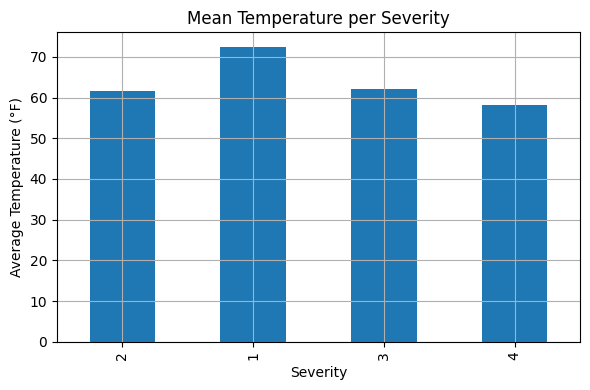

In [39]:
mean_temp = df2.groupby('Severity')['Temperature(F)'].mean()
print(type(mean_temp))
mean_temp = mean_temp.to_pandas()
print(type(mean_temp))
mean_temp.plot(kind='bar', figsize=(6,4))
plt.title('Mean Temperature per Severity')
plt.xlabel('Severity')
plt.ylabel('Average Temperature (°F)')
plt.grid(True)
plt.tight_layout()
plt.show()

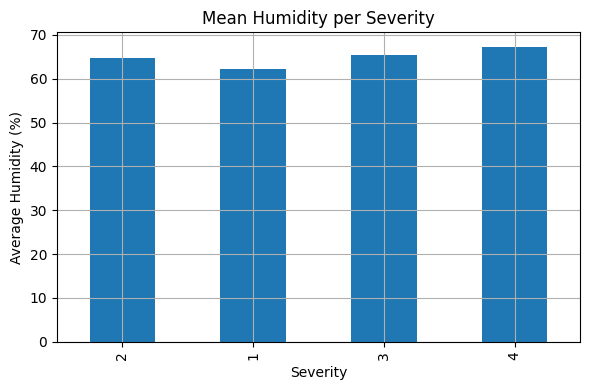

In [40]:
# محاسبه میانگین رطوبت در هر سطح از شدت تصادف
mean_humidity = df2.groupby('Severity')['Humidity(%)'].mean()
mean_humidity= mean_humidity.to_pandas()
# رسم نمودار bar خیلی سبک
mean_humidity.plot(kind='bar', figsize=(6,4))
plt.title('Mean Humidity per Severity')
plt.xlabel('Severity')
plt.ylabel('Average Humidity (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


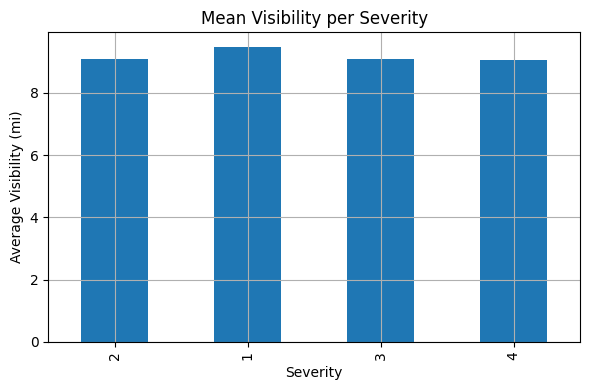

In [41]:
# محاسبه میانگین میزان دید برای هر سطح شدت تصادف
mean_visibility = df2.groupby('Severity')['Visibility(mi)'].mean()
mean_visibility = mean_visibility.to_pandas()

# رسم نمودار bar
mean_visibility.plot(kind='bar', figsize=(6,4))
plt.title('Mean Visibility per Severity')
plt.xlabel('Severity')
plt.ylabel('Average Visibility (mi)')
plt.grid(True)
plt.tight_layout()
plt.show()


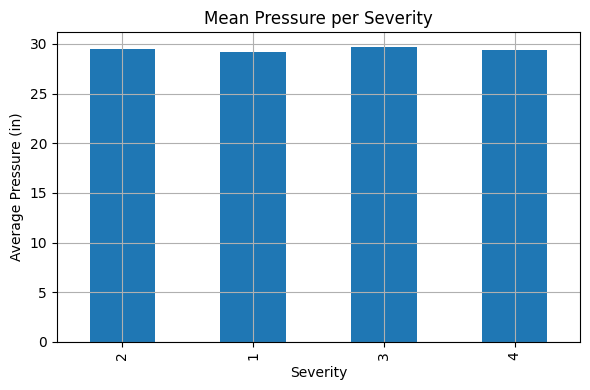

In [42]:
# محاسبه میانگین فشار هوا برای هر سطح شدت تصادف
mean_pressure = df2.groupby('Severity')['Pressure(in)'].mean()
mean_pressure = mean_pressure.to_pandas()

# رسم نمودار bar
mean_pressure.plot(kind='bar', figsize=(6,4))
plt.title('Mean Pressure per Severity')
plt.xlabel('Severity')
plt.ylabel('Average Pressure (in)')
plt.grid(True)
plt.tight_layout()
plt.show()


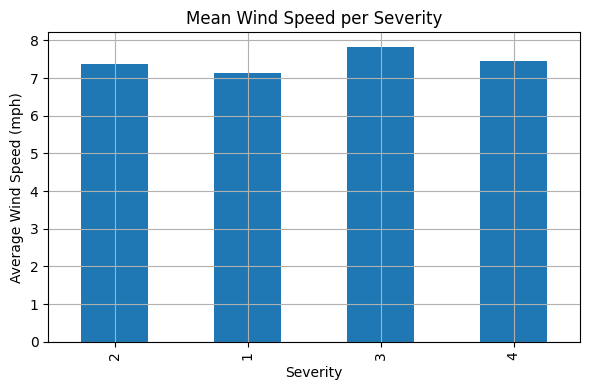

In [43]:
# محاسبه میانگین سرعت باد برای هر شدت تصادف
mean_wind_speed = df2.groupby('Severity')['Wind_Speed(mph)'].mean()
mean_wind_speed = mean_wind_speed.to_pandas()

# رسم نمودار bar
mean_wind_speed.plot(kind='bar', figsize=(6,4))
plt.title('Mean Wind Speed per Severity')
plt.xlabel('Severity')
plt.ylabel('Average Wind Speed (mph)')
plt.grid(True)
plt.tight_layout()
plt.show()


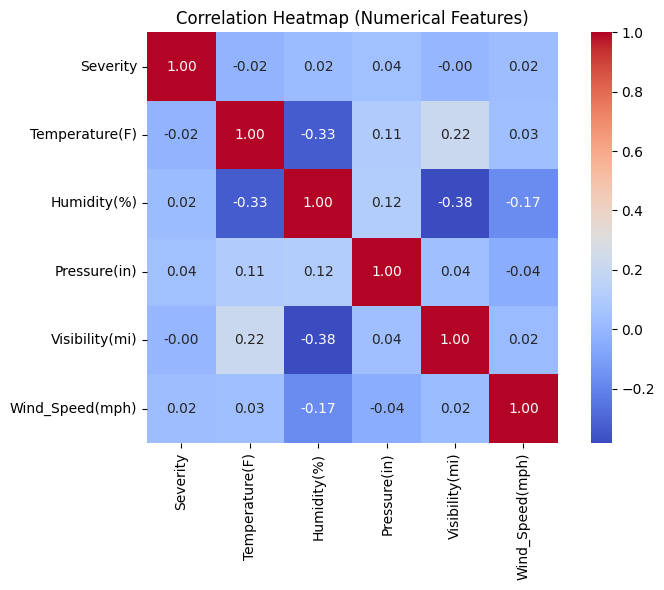

In [44]:
# تبدیل فقط ستون‌های عددی به پانداس
numeric_cols = ['Severity', 'Temperature(F)', 'Humidity(%)',
                'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

# فقط همین بخش از دیتافریم رو تبدیل کن تا رم فشار نیاد
df_corr = df2[numeric_cols].to_pandas()

# محاسبه همبستگی و رسم heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap (Numerical Features)')
plt.tight_layout()
plt.show()


<ipython-input-45-287ea9dd668e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_sorted.values, y=correlation_sorted.index, palette='coolwarm')


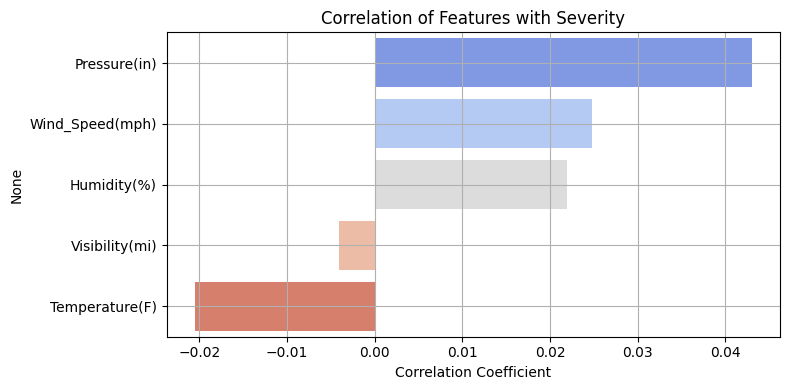

In [45]:
numeric_cols = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)',
                'Visibility(mi)', 'Wind_Speed(mph)']

# تبدیل فقط همونا به pandas
df_numeric = df2[['Severity'] + numeric_cols].to_pandas()

# محاسبه همبستگی فقط با Severity
correlation_with_severity = df_numeric.corr()['Severity'].drop('Severity')

# مرتب کردن از بیشترین به کمترین
correlation_sorted = correlation_with_severity.sort_values(ascending=False)

# رسم barplot
plt.figure(figsize=(8,4))
sns.barplot(x=correlation_sorted.values, y=correlation_sorted.index, palette='coolwarm')
plt.title('Correlation of Features with Severity')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.grid(True)
plt.show()

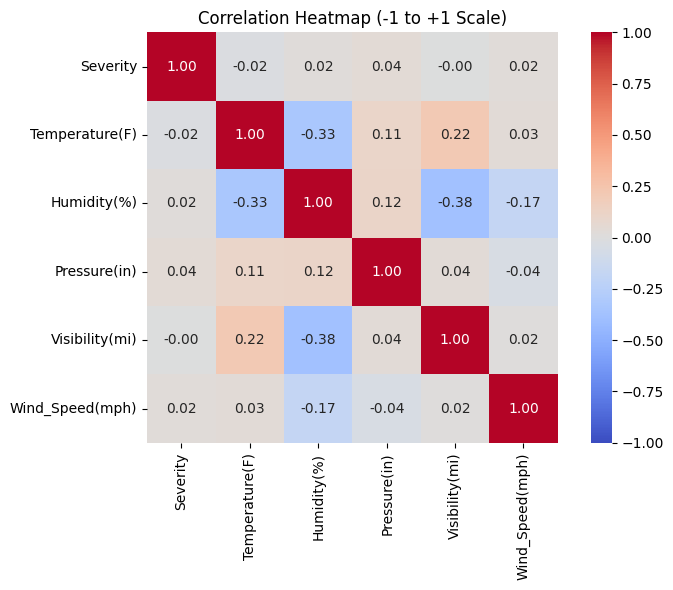

In [46]:

# انتخاب ستون‌های عددی و تبدیل به pandas
numeric_cols = ['Severity', 'Temperature(F)', 'Humidity(%)',
                'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
df_corr = df2[numeric_cols].to_pandas()

# محاسبه همبستگی
corr_matrix = df_corr.corr()

# رسم Heatmap با مقیاس کامل
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            vmin=-1, vmax=1, square=True)

plt.title('Correlation Heatmap (-1 to +1 Scale)')
plt.tight_layout()
plt.show()


In [47]:
df3 = df2

In [48]:
df3.head()

,Severity,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),weather_condition_Label,Wind_Direction_label
0,3,925765632,36,91,29.680000,10,3,62,1
1,2,1832560640,37,100,29.650000,10,3,62,1
2,2,2002255872,36,100,29.670000,10,3,88,16
3,3,856453120,35,96,29.639999,9,4,85,16
4,2,3208288256,36,89,29.650000,6,3,85,16


In [ ]:

def cor_selector(X, y, num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # for i in X.columns.tolist():
    #     cor = np.corrcoef(X[i], y)[0, 1]
    #     cor_list.append(cor)
    for i in X.columns.tolist():
        cor = X[i].corr(y)
        cor_list.append(cor)
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature



numerical_features = df3.select_dtypes(include=np.number)

numerical_features = numerical_features.drop('Severity', axis=1)

target = df3['Severity']

num_feats = 5

cor_support, cor_feature = cor_selector(numerical_features, target, num_feats)

print(str(len(cor_feature)), 'selected features')
print('selected features:', cor_feature)

5 selected features
selected features: ['Humidity(%)', 'Wind_Speed(mph)', 'Wind_Direction_label', 'Pressure(in)', 'weather_condition_Label']


In [ ]:
from scipy.stats import pearsonr

def cor_selector(X, y, num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    for i in X.columns.tolist():
        cor, _ = pearsonr(X[i].to_numpy(), y.to_numpy())  # محاسبه همبستگی پیرسون
        cor_list.append(cor)
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature


numerical_features = df3.select_dtypes(include=np.number)

numerical_features = numerical_features.drop('Severity', axis=1)

# تعیین متغیر هدف
target = df3['Severity']


for i in range(1,4):
  num_feats = i

  cor_support, cor_feature = cor_selector(numerical_features, target, num_feats)

  print(str(len(cor_feature)), 'selected features')
  print('selected features:', cor_feature)

1 selected features
selected features: ['weather_condition_Label']
2 selected features
selected features: ['Pressure(in)', 'weather_condition_Label']
3 selected features
selected features: ['Wind_Direction_label', 'Pressure(in)', 'weather_condition_Label']


In [65]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2



categorical_features = df3[['Wind_Direction_label', 'weather_condition_Label']]

target = df3['Severity']

num_feats = 1

selector = SelectKBest(chi2, k=num_feats)
selector.fit(categorical_features.to_numpy(), target.to_numpy())

selected_features = categorical_features.columns[selector.get_support()]

print(str(len(selected_features)), 'selected categorical features')
print('selected categorical features:', selected_features)

1 selected categorical features
selected categorical features: Index(['weather_condition_Label'], dtype='object')


weather_condition_Label = OK